Importing the dependencies

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


importing the datset


In [85]:
data = pd.read_csv("Data.csv")
data

,price,bedrooms,sqft_living,sqft_above,sqft_basement
0,313000,3,1340,1340,0
1,2384000,5,3650,3370,280
2,342000,3,1930,1930,0
3,420000,3,2000,1000,1000
4,550000,4,1940,1140,800
...,...,...,...,...,...
395,255000,2,960,960,0
396,610000,3,2480,1620,860
397,920000,4,3750,3750,0
398,402500,4,2600,2600,0


First 5 rows


In [86]:
data.head(5)

,price,bedrooms,sqft_living,sqft_above,sqft_basement
0,313000,3,1340,1340,0
1,2384000,5,3650,3370,280
2,342000,3,1930,1930,0
3,420000,3,2000,1000,1000
4,550000,4,1940,1140,800


checking the no. of rows and colulmns

In [87]:
data.shape

(400, 5)

In [88]:
#Checking for missing values
data.isnull().sum()

price            0
bedrooms         0
sqft_living      0
sqft_above       0
sqft_basement    0
dtype: int64

In [89]:
#Statistical measures of our data
data.describe()

,price,bedrooms,sqft_living,sqft_above,sqft_basement
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,5.473539e+05,3.400000,2100.802500,1787.127500,313.675000
std,3.307990e+05,0.978465,1020.490068,875.944844,464.596998
min,1.000000e+05,1.000000,720.000000,650.000000,0.000000
25%,3.450000e+05,3.000000,1447.500000,1170.000000,0.000000
50%,4.862925e+05,3.000000,1925.000000,1550.000000,0.000000
75%,6.300000e+05,4.000000,2542.500000,2135.000000,620.000000
max,3.200000e+06,9.000000,13540.000000,9410.000000,4130.000000


Understanding the correlation of data
1. Positive
2. Negative

<Axes: >

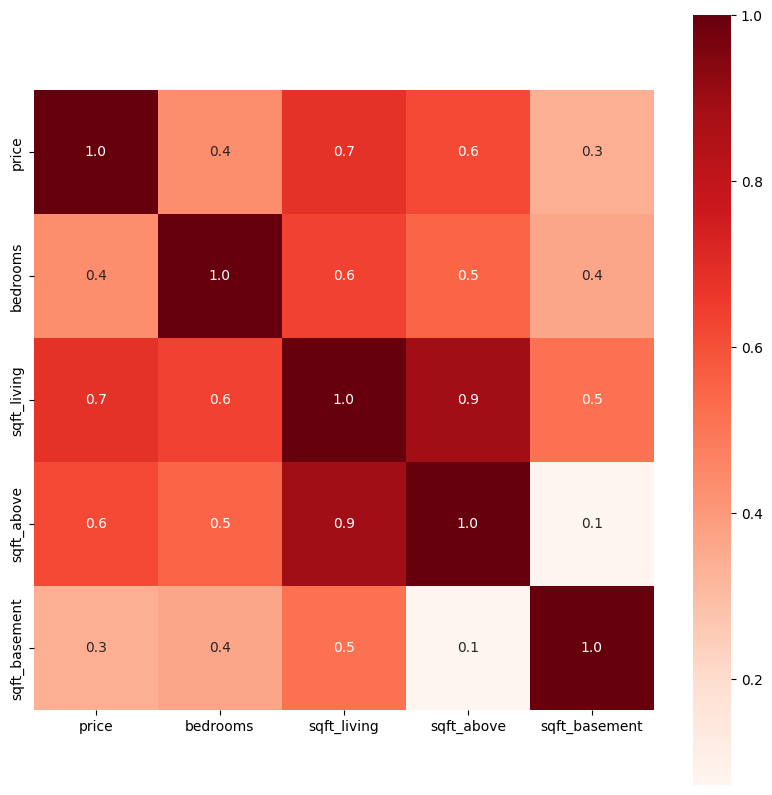

In [90]:
Correlation = data.corr()

# COnstructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sb.heatmap(Correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':10},cmap='Reds')

In [91]:
#splitting the data and target
X=data.drop(['price'],axis=1)
Y=data['price']


print(X)
print(Y)

     bedrooms  sqft_living  sqft_above  sqft_basement
0           3         1340        1340              0
1           5         3650        3370            280
2           3         1930        1930              0
3           3         2000        1000           1000
4           4         1940        1140            800
..        ...          ...         ...            ...
395         2          960         960              0
396         3         2480        1620            860
397         4         3750        3750              0
398         4         2600        2600              0
399         3         1390         840            550

[400 rows x 4 columns]
0       313000
1      2384000
2       342000
3       420000
4       550000
        ...   
395     255000
396     610000
397     920000
398     402500
399     280950
Name: price, Length: 400, dtype: int64


In [92]:
#Splitting the datas into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(400, 4) (280, 4) (120, 4)
(400,) (280,) (120,)


Model Training(Using xgboost regressor)



In [93]:
#loading the model
model = XGBRegressor()

#training model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation

prediction on training data

In [94]:
#accuracy for prediction on training data
data_pred = model.predict(X_train)
print(data_pred)

[ 281913.4   507448.66  437100.12  212652.17  339455.62  238288.86
  401369.75  534623.25  437933.5   317807.56  386751.47  359344.03
 1030042.6   644619.8   289610.8   313850.53  700253.8  1033563.06
  401369.75 1396578.2   354557.88  640094.3   467722.12  731253.06
  474525.22  437298.5   418175.78  456718.06  504305.62  686562.94
  828857.4   503981.56  646212.3   541548.7   384808.12  592709.06
  503710.16  729323.6  2375533.8   477730.06  746361.1   326486.75
  517414.75  745069.6   470775.94  546154.4   437300.12  595477.8
  300241.12  529974.44  414004.62  300476.75  704736.1   768248.7
  450239.3   520547.66  384828.84  506009.66  229559.66  564325.4
 1867839.5   582411.6   495297.84  784217.1   405125.2   551277.94
  566623.7   664672.9  1155977.1   531951.25  214086.47  250462.25
  384670.47  234730.22  534777.5   346996.97  588044.5   331519.97
  367458.56  576496.56  958640.94  386043.78  431437.3   242608.16
  363203.16  662552.1   238288.86  528975.44  585359.56  537901.6

In [95]:
#Error for training data
# R squared error
score_1 = metrics.r2_score(Y_train, data_pred)




print("R squared error:", score_1)


R squared error: 0.9918022934695082


In [96]:
#prediction on testing data
test_data = model.predict(X_test)

#error value for test data
# R squared error
score_2 = metrics.r2_score(Y_test, test_data)



print("R squared error:", score_2)

R squared error: 0.12252147398285407


Visualizing the actual and predicted prices

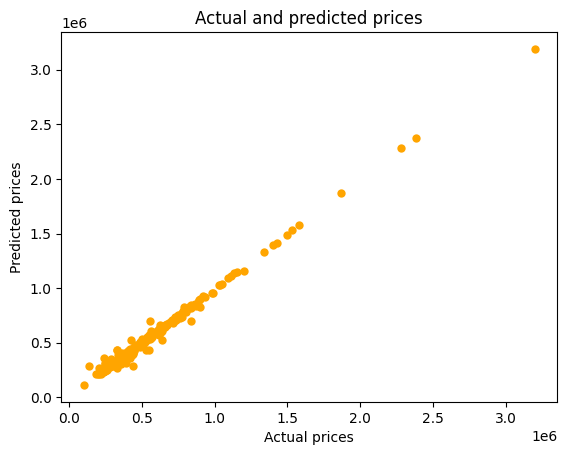

In [98]:
plt.scatter(Y_train,data_pred,c= 'orange',linewidth=0.00002)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual and predicted prices")
plt.show()